# Image segmentation with K-means
In this notebook we will experiment with the k-means algorithm for image segmentation based on color similarity. The goal is to cluster the image pixels according to their color. We can visualize the pixels as points in a 3-dimensional space (since the color is a 3-d vector). In order for distances between colors to be perceptually meaningful, we work in the CIELAB color space.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=100
import numpy as np
from imageio import imread
from skimage.transform import rescale
from skimage.color import rgb2lab, lab2rgb
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Load in an image, reshape it (to reduce the workload), and display it.

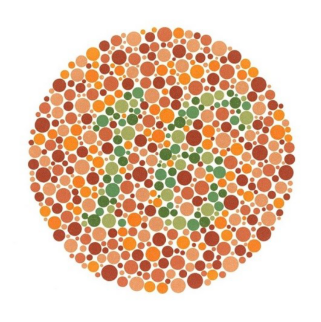

In [2]:
image_raw = imread('Cirkel2.jpeg')
image_width = 500
image = rescale(image_raw, image_width/image_raw.shape[0], mode='reflect', multichannel=True, anti_aliasing=True)
shape = image.shape
plt.figure()
plt.imshow(image)
plt.axis('off');

Display a scatter plot of the image pixels, colored by their actual pixel color

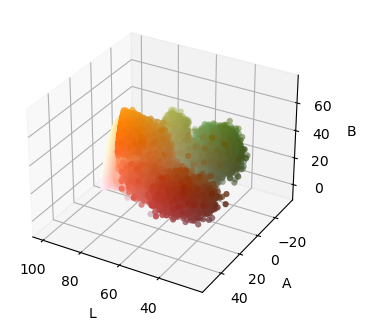

In [3]:
# Enable this to be able to rotate the scatter plot
#%matplotlib notebook 
X = rgb2lab(image).reshape(-1, 3)
plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=30., azim=120)
ax.set_xlabel("L")
ax.set_ylabel("A")
ax.set_zlabel("B")
image_c = [image.reshape(-1, 3)[i, :] for i in range(image.shape[0] * image.shape[1])]
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],c=image_c, marker='o', linewidths=0);

Cluster the image pixels, treating colors as 3-dimensional points

In [4]:
# Define a plotting function
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
def plot_with_centers(X, y, centers):
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(elev=20., azim=120)
    ax.set_xlabel("L")
    ax.set_ylabel("A")
    ax.set_zlabel("B")
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=[colors[i % len(colors)] for i in y_kmeans], 
                 linewidths=0)
    ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], 
                 c=[colors[i % len(colors)] for i in range(K)], marker='+', s=200);

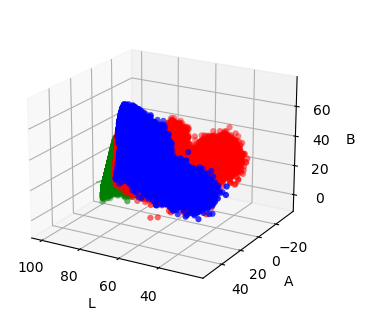

In [5]:
def cluster_assignments(X, Y):
    return np.argmin(euclidean_distances(X,Y), axis=1)

K = 3
centers = np.array([X.mean(0) + (np.random.randn(3)/10) for _ in range(K)])
y_kmeans = cluster_assignments(X, centers)

# repeat estimation a number of times (could do something smarter, like comparing if clusters change)
for i in range(30):
    # assign each point to the closest center
    y_kmeans = cluster_assignments(X, centers)

    # move the centers to the mean of their assigned points (if any)
    for i, c in enumerate(centers):
        points = X[y_kmeans == i]
        if len(points):
            centers[i] = points.mean(0)

plot_with_centers(X, y_kmeans, centers)

Plot the result as an image, where each pixel is colored by its cluster mean

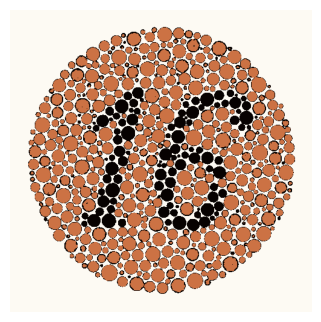

In [6]:
count = np.bincount(y_kmeans)
count_min = np.argmin(count)
centers[count_min, :] = [1, 1, 1]
plt.figure()
plt.imshow(lab2rgb(centers[y_kmeans,:].reshape(shape[0], shape[1], 3)))
plt.axis('off');

$\star$ Experiment with increasing/decreasing the image resolution (image_width)

$\star$ Try out the different images **soccerball.jpg**, **roadsign.jpg**, **bananas.jpg**, **gates.jpg**

$\star$ Experiment with different values of K